In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [2]:
#La intención es crear un structured array para poder mezclar tipos de datos.
# Primero cargamos la primera columna para ver cuantas observaciones hay, hago esto para saltarme computación en el paso 
# siguiente. 
# Luego cargo la primera fila para poder asignar los nombres al structured array y ver cuantas columnas tiene. 
# Luego cargo cada columna por separado y guardo el formato que genfromtxt decide que es el mejor en una tupla junto al 
# nombre de la columna y guardo la tupla en en un array. 
# Por último, cargo el dataset con genfromtxt, porque tiene missing values y los trata mejor que loadtxt, y le doy el 
# argumento dtype= al array de nombres y formatos para crear el structured array
cantidad_observaciones=len(np.genfromtxt("data/Speculation_Watch_List.tsv", delimiter="\t",dtype=str,skip_header=1,usecols=[0]))
nombres=np.genfromtxt("data/Speculation_Watch_List.tsv", delimiter="\t",dtype=str,skip_footer=cantidad_observaciones)
dtipos=[]
for i in range(len(nombres)):
    tipo_dato=np.genfromtxt("data/Speculation_Watch_List.tsv", delimiter="\t",usecols=i,encoding=None,dtype=None,skip_header=1)
    dtipos.append(tuple([nombres[i],tipo_dato.dtype.str]))
data=np.genfromtxt("data/Speculation_Watch_List.tsv", delimiter="\t", dtype=dtipos,skip_header=1)

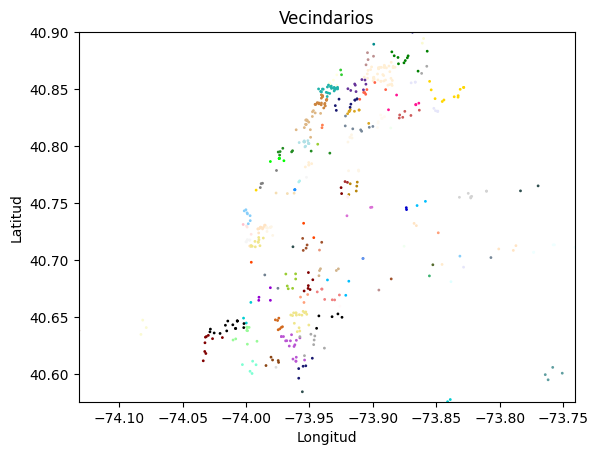

In [3]:
#creo un mapa de las localizaciones de las casas que comparten color si tienen el mismo código postal
np.random.seed(26)
colors = mcolors.CSS4_COLORS
codigo_postal=np.unique(data['Postcode'])
random_colors=np.random.choice([*colors],len(codigo_postal),replace=True)
diccionario_colores = dict(zip(codigo_postal, random_colors))
asignacion_colores=[]
for j in data['Postcode']:
    asignacion_colores.append(diccionario_colores[j])
plt.scatter(data['Longitude'],data['Latitude'],c=asignacion_colores,s=1)
plt.xlim(np.nanmin(data['Longitude']),np.nanmax(data['Longitude']))
plt.ylim(np.nanmin(data['Latitude']),np.nanmax(data['Latitude']))
plt.title("Vecindarios")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

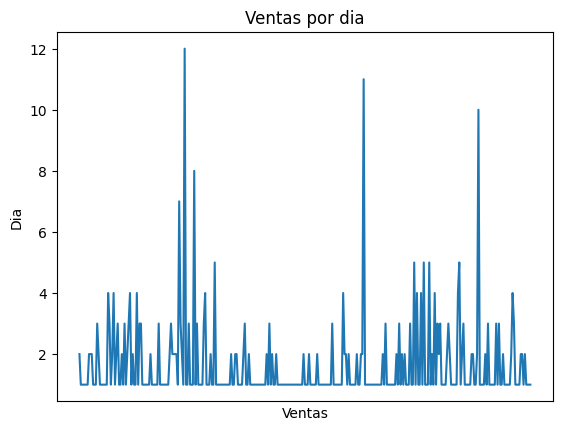

El dia que mas se vendio fue el 2018-12-10 .
La media de los precios ese mes fur 7125208.0 $


In [4]:
# El formato de fechas que nos dan es MDY, y numpy.datetime64 solo acepta YMD, y el separador tiene que ser "-" no puede
# ser "/", así que primero separo los números y los vuelvo a juntar bien ordenados. Luego los convierto a formato de fecha
# y cuento la cantidad de valores únicos y represento las ventas en los días que hubo al menos 1. Indico el día que más
# ventas hubo y miro el precio medio de ese mes.
separar_fechas=np.vstack(np.chararray.split(data['deed_date'], sep ='/'))
fechas_YMD=[]
for k in range(len(separar_fechas)):
    fechas_YMD.append(separar_fechas[k][2]+'-'+separar_fechas[k][0]+'-'+separar_fechas[k][1])
fechas_YMD=np.array(fechas_YMD, dtype='datetime64')
fechas_unicas,cantidad_ventas=np.unique(np.sort(fechas_YMD),return_counts=True)
plt.plot(range(len(fechas_unicas)),cantidad_ventas)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.title("Ventas por dia")
plt.xlabel('Ventas')
plt.ylabel('Dia')
plt.show()
print('El dia que mas se vendio fue el %s .' %fechas_unicas[np.argmax(cantidad_ventas)])
print('La media de los precios ese mes fur',np.around(np.nanmean(data['price']
                                                       [np.where((separar_fechas[:,2]=='2018') & 
                                                                 (separar_fechas[:,0]=='12'))])),'$')

In [5]:
media=np.nanmean(data['price'])
percentil_95=np.nanpercentile(data['price'],95)
varianza=np.nanvar(data['price'])
print('La media de todos los precios es', np.around(media),'$')
print('El top 5\% de precios es', np.around(percentil_95),'$')
print('La varianza de los precios es', np.around(varianza))

La media de todos los precios es 9284909.0 $
El top 5\% de precios es 22500000.0 $
La varianza de los precios es 84726665602425.0
